In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
x = """     Ben Bunu Biliyorum biraz da şunu konuşalım

                                                         

Lam lam alm gelmedi   aldı Seni O da gelmedi yar
Lam lam alm   gelmedi aldı Seni O da gelmedi  yar
Lam lam alm gelmedi   aldı Seni O da gelmedi yar   """  #Sorry about my "poetics" i coulndt figure out something better 

In [30]:
stringg = x
" ".join(re.split("\s+", stringg, flags=re.UNICODE)) #with this way eliminating white spaces and lines

' Ben Bunu Biliyorum biraz da şunu konuşalım Lam lam alm gelmedi aldı Seni O da gelmedi yar Lam lam alm gelmedi aldı Seni O da gelmedi yar Lam lam alm gelmedi aldı Seni O da gelmedi yar '

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')
data.head(4)


,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [122]:
class detectspamstrict(object):
    
    def fit_str(self,stringg:str):   #In the end i have learned that column vectorizer figures this one out but for using strict this needed
        stringg = stringg.lower() 
        self.arr= np.array(" ".join(re.split("\s+", stringg, flags=re.UNICODE)).split())
        return self.arr
    
    def fit_array(self,array:np.array): #this also not very necessary, at least last part is called at Predict
        length = array.size
        for a in range(length):
            array[a] = array[a].lower()
            array[a] =" ".join(re.split("\s+", array[a], flags=re.UNICODE))
        array = self.cv.transform(array)
        return array
    
    def strict(self,keyss,returncount=True): #If you just want to filter with some keys that you need to provide this works
        self.keyss = np.array([keyss[a].lower() for a in range(len(keyss))])
        ll=[]
        for a in range(self.keyss.size):
            amount=np.where(self.keyss[a] == self.arr)[0].size
            ll.append((keyss[a],amount))
        if sum(dict(ll).values()) !=0 and returncount:
            return "spam",dict(ll)
        elif sum(dict(ll).values()) !=0:
            return "spam"
        else:
            return "Not Spam"
    def processDataFrame(self,data,label1:str,label2:str): # If you want to train model and you only have a dataframe
        

        data2=data.copy()
        data2[label1+" processed"] =data2[label1].apply(lambda x: " ".join(self.fit_str(x)))
        self.data2 = data2
        self.label1 = label1
        self.label2 = label2
        self.x=np.array(self.data2[self.label1])
        self.y=np.array(self.data2[self.label2])
        
    def model_train_test_build(self,y = None,x=None): #if you have x and y just use this one
        if x == None:
            x = self.x
        else:
            x = x
        if y ==None:
            y = self.y
        else:
            y  = y
            
        self.cv = CountVectorizer()
        self.clf = MultinomialNB()
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y ,random_state=42)
        X_train =self.cv.fit_transform(X_train)
        X_test = self.cv.transform(X_test)
        self.clf.fit(X_train,y_train)
        pred = self.clf.predict(X_test)
        self.matrix=confusion_matrix(y_test,pred)
        sns.set(font_scale=1.5)
        fig, ax = plt.subplots(figsize=(3, 3))
        ax = sns.heatmap(self.matrix,
                     annot=True,
                     cbar=False)
        plt.xlabel("Predicted label")
        plt.ylabel("True label")
        print("Accuracy : ",sum(pred==y_test)/y_test.size)
        
    def Predict(self,inp=None):  #After all steps use this, you may just give an string or a array of strings
    
        if inp is None:
            inp = str(input())

        
        if type(inp) == str:
            inp = np.array([" ".join((self.fit_str(inp)))])
            inp = self.cv.transform(inp)
            return self.clf.predict(inp)
        elif type(inp)==np.ndarray:
            inp  = self.fit_array(inp)
            return self.clf.predict(inp)
        else:
            print("lala")
            
            



Accuracy :  0.9838516746411483


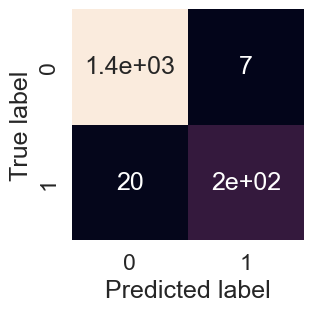

In [123]:
dtc = detectspamstrict()
dtc.processDataFrame(data,"message","class")

dtc.model_train_test_build()


In [124]:
sample=data.sample(10)
xtest=sample["message"].to_numpy()
ytest=sample["class"].to_numpy()

In [125]:
xtest
ytest

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype=object)

In [126]:
predicted=dtc.Predict(xtest)

In [127]:
sum(predicted == ytest)/ytest.size

1.0

Let's try my little poem and see is it a scam or not!

In [128]:

dtc.Predict(x)
#Oh nice i am not a fraud or something

array(['ham'], dtype='<U4')

In [129]:
predicted

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype='<U4')

In [131]:
dtc.Predict()  #just give it empty


You have won 3000 Dollars


array(['spam'], dtype='<U4')